# report

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
def load_pickle(pickle_path):
    with open(pickle_path, 'rb') as f:
        training_metrics = pickle.load(f)
    return training_metrics

In [3]:
def insert_into_df(df, column_name, column_data):
    if len(column_data) < len(df):
        # add nan to column_data
        column_data_np = np.ones(len(df)) * np.nan
        column_data_np[:len(column_data)] = column_data
        column_data = column_data_np
    df[column_name] = column_data
    return df

In [4]:
def get_metric_df(metric_df_tuple, new_metric_path, new_metric_name):
    # train_loss length: 20
    # train_accuracy length: 20
    # val_loss length: 20
    # val_accuracy length: 20
    # val_f1 length: 20
    train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = metric_df_tuple
    new_metric_obj = load_pickle(new_metric_path)
    new_metric_train_loss = np.array(new_metric_obj['train_loss'])
    new_metric_train_accuracy = np.array(new_metric_obj['train_accuracy'])
    new_metric_val_loss = np.array(new_metric_obj['val_loss'])
    new_metric_val_accuracy = np.array(new_metric_obj['val_accuracy'])
    new_metric_val_f1 = np.array(new_metric_obj['val_f1'])
    train_loss_df = insert_into_df(train_loss_df, new_metric_name, new_metric_train_loss)
    train_accuracy_df = insert_into_df(train_accuracy_df, new_metric_name, new_metric_train_accuracy)
    val_loss_df = insert_into_df(val_loss_df, new_metric_name, new_metric_val_loss)
    val_accuracy_df = insert_into_df(val_accuracy_df, new_metric_name, new_metric_val_accuracy)
    val_f1_df = insert_into_df(val_f1_df, new_metric_name, new_metric_val_f1)

    return train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df

In [5]:
epoch_list = np.arange(1,10+1)
epoch_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [40]:
train_loss_df = pd.DataFrame(epoch_list, columns=['epoch'])
train_accuracy_df = pd.DataFrame(epoch_list, columns=['epoch'])
val_loss_df = pd.DataFrame(epoch_list, columns=['epoch'])
val_accuracy_df = pd.DataFrame(epoch_list, columns=['epoch'])
val_f1_df = pd.DataFrame(epoch_list, columns=['epoch'])

In [56]:
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_accuracy_df, val_accuracy_df, val_f1_df),
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.01_lr/training-metrics.pkl",
    "lr=0.01"
)

In [57]:
train_loss_df, train_accuracy_df, val_accuracy_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_accuracy_df, val_accuracy_df, val_f1_df),
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.005_lr/training-metrics.pkl",
    "lr=0.005"
)

In [58]:
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df),
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.001_lr/training-metrics.pkl",
    "lr=0.001"
)

In [59]:
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df),
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.001_lr/20+10/metrics_10000-samples_0.2-test_ratio_0-random_seed_20+10-epochs_128-batch_size.pkl",
    "lr=0.001_20+10"
)

In [60]:
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df),
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.0001_lr/training-metrics.pkl",
    "lr=0.0001"
)
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df),
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.0001_lr/20+10/metrics_10000-samples_0.2-test_ratio_0-random_seed_10-epochs_128-batch_size.pkl",
    "lr=0.0001_20+10"
)

# check value

In [50]:
train_loss_df

,epoch,lr=0.01,lr=0.005,lr=0.001,lr=0.001_20+10,lr=0.0001,lr=0.0001_20+10
0,1,NaN,2.571733,3.189345,1.502642,4.571007,2.094099
1,2,NaN,1.913086,2.464015,1.436358,3.575754,1.809876
2,3,NaN,1.727020,2.242914,1.379239,3.280048,1.660192
3,4,NaN,1.604263,2.115729,1.331128,3.118112,1.556600
4,5,NaN,1.516034,2.027004,1.293409,3.005464,1.479276
5,6,NaN,1.450379,1.956998,1.267103,2.916130,1.419096
6,7,NaN,1.400695,1.899226,1.258350,2.839723,1.372439
7,8,NaN,1.368197,1.849631,1.301964,2.772338,1.348067
8,9,NaN,1.368564,1.805525,NaN,2.711978,1.351886
9,10,NaN,3.507136,1.765777,NaN,2.657655,1.835751


In [92]:
train_accuracy_df

,epoch,lr=0.001
0,1,0.101815
1,2,0.103579
2,3,0.103579
3,4,0.103579
4,5,0.103579
5,6,0.103579
6,7,0.103579
7,8,0.103579
8,9,0.103579
9,10,0.103579


In [93]:
val_loss_df

,epoch,lr=0.001
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [94]:
val_accuracy_df

,epoch,lr=0.001
0,1,0.1035
1,2,0.1035
2,3,0.1035
3,4,0.1035
4,5,0.1035
5,6,0.1035
6,7,0.1035
7,8,0.1035
8,9,0.1035
9,10,0.1035


In [87]:
val_f1_df

,epoch
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# plot

In [7]:
def plot_metric(df, metric_name, title, y_label):
    
    plt.grid()
    for col in df.columns:
        if col != 'epoch':
            # y_min = min(y_min, df[col].min())
            # y_max = max(y_max, df[col].max())
            plt.plot(df['epoch'], df[col], label=col)
    # plt.ylim(y_min, y_max)
    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    # plt.show()
    plt.savefig(f"./report/{metric_name}.pdf", bbox_inches='tight')
    plt.close()

In [65]:
train_loss_df['lr=0.0001'] = np.concatenate((train_loss_df['lr=0.0001'][:20], train_loss_df['lr=0.0001_20+10'][:10]))
train_loss_df.drop(columns=['lr=0.0001_20+10'], inplace=True)
train_loss_df['lr=0.001'] = np.concatenate((train_loss_df['lr=0.001'][:20], train_loss_df['lr=0.001_20+10'][:10]))
train_loss_df.drop(columns=['lr=0.001_20+10'], inplace=True)
train_loss_df.drop(columns=['lr=0.01'], inplace=True)

In [96]:
plot_metric(train_loss_df, 'train_loss', 'Training Loss', 'Loss')

In [85]:
# train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df
train_accuracy_df['lr=0.0001'] = np.concatenate((train_accuracy_df['lr=0.0001'][:20], train_accuracy_df['lr=0.0001_20+10'][:10]))
train_accuracy_df.drop(columns=['lr=0.0001_20+10'], inplace=True)
train_accuracy_df['lr=0.001'] = np.concatenate((train_accuracy_df['lr=0.001'][:20], train_accuracy_df['lr=0.001_20+10'][:10]))
train_accuracy_df.drop(columns=['lr=0.001_20+10'], inplace=True)
train_accuracy_df.drop(columns=['lr=0.01'], inplace=True)

In [97]:
plot_metric(train_accuracy_df, 'train_accuracy', 'Training Accuracy', 'Accuracy')

In [98]:
# train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df
val_loss_df['lr=0.0001'] = np.concatenate((val_loss_df['lr=0.0001'][:20], val_loss_df['lr=0.0001_20+10'][:10]))
val_loss_df.drop(columns=['lr=0.0001_20+10'], inplace=True)
val_loss_df['lr=0.001'] = np.concatenate((val_loss_df['lr=0.001'][:20], val_loss_df['lr=0.001_20+10'][:10]))
val_loss_df.drop(columns=['lr=0.001_20+10'], inplace=True)
val_loss_df.drop(columns=['lr=0.01'], inplace=True)

In [99]:
plot_metric(val_loss_df, 'val_loss', 'Validation Loss', 'Loss')

In [100]:
# train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df
val_accuracy_df['lr=0.0001'] = np.concatenate((val_accuracy_df['lr=0.0001'][:20], val_accuracy_df['lr=0.0001_20+10'][:10]))
val_accuracy_df.drop(columns=['lr=0.0001_20+10'], inplace=True)
val_accuracy_df['lr=0.001'] = np.concatenate((val_accuracy_df['lr=0.001'][:20], val_accuracy_df['lr=0.001_20+10'][:10]))
val_accuracy_df.drop(columns=['lr=0.001_20+10'], inplace=True)
val_accuracy_df.drop(columns=['lr=0.01'], inplace=True)

In [101]:
plot_metric(val_accuracy_df, 'val_accuracy', 'Validation Accuracy', 'Accuracy')

In [102]:
# train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df
val_f1_df['lr=0.0001'] = np.concatenate((val_f1_df['lr=0.0001'][:20], val_f1_df['lr=0.0001_20+10'][:10]))
val_f1_df.drop(columns=['lr=0.0001_20+10'], inplace=True)
val_f1_df['lr=0.001'] = np.concatenate((val_f1_df['lr=0.001'][:20], val_f1_df['lr=0.001_20+10'][:10]))
val_f1_df.drop(columns=['lr=0.001_20+10'], inplace=True)
val_f1_df.drop(columns=['lr=0.01'], inplace=True)

In [103]:
plot_metric(val_f1_df, 'val_f1', 'Validation F1 Score', 'F1 Score')

# others

In [ ]:
pickle_paths = [
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.001_lr/training-metrics.pkl",
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.0001_lr/training-metrics.pkl",
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.01_lr/training-metrics.pkl",
    "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.005_lr/training-metrics.pkl"
]
training_metrics_list = []
for pickle_path in pickle_paths:    
    with open(pickle_path, 'rb') as f:
        training_metrics = pickle.load(f)
        training_metrics_list.append(training_metrics)

In [62]:
# training_metric_lr_01
training_metric_lr_01_path = "./models/model_10000-samples_0.2-test_ratio_0-random_seed_20-epochs_128-batch_size-0.01_lr/training-metrics.pkl"
training_metric_lr_01 = load_pickle(training_metric_lr_01_path)

In [66]:
for k in training_metric_lr_01.keys():
    print(f'{k} length: {len(training_metric_lr_01[k])}')

train_loss length: 20
train_accuracy length: 20
val_loss length: 20
val_accuracy length: 20
val_f1 length: 20
confusion_matrix length: 10


In [70]:
train_loss_lr_01 = np.array(training_metric_lr_01['train_loss'])

In [71]:
train_loss_lr_01

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [74]:
train_loss_df = pd.DataFrame(epoch_list, columns=['epoch'])

In [75]:
train_loss_df 

,epoch
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [77]:
train_loss_lr_01

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [78]:
train_loss_df = insert_into_df(train_loss_df, 'train_loss_lr_01', train_loss_lr_01)

In [79]:
train_loss_df

,epoch,train_loss_lr_01
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


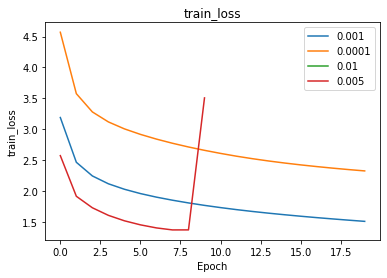

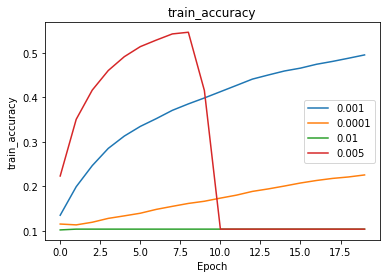

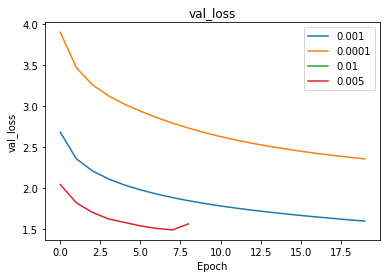

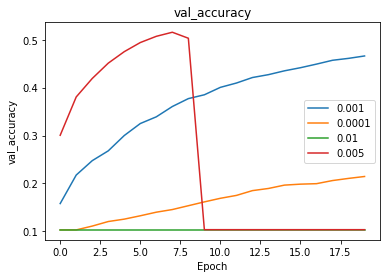

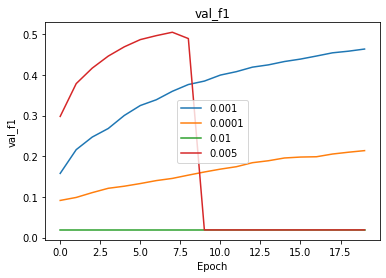

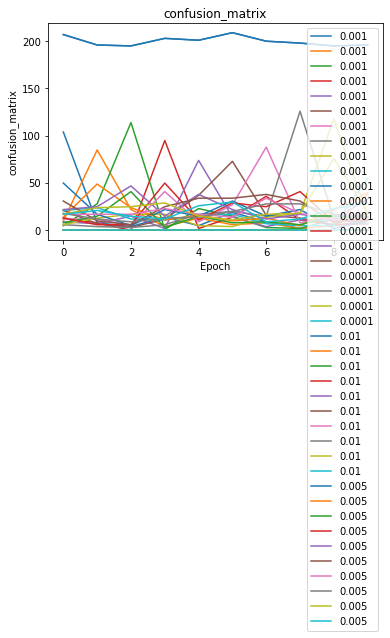

In [46]:
for k in training_metrics_list[0].keys():
    plt.title(k)
    plt.plot(training_metrics_list[0][k], label="0.001")
    plt.plot(training_metrics_list[1][k], label="0.0001")
    plt.plot(training_metrics_list[2][k], label="0.01")
    plt.plot(training_metrics_list[3][k], label="0.005")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(k)
    plt.show()
    plt.close()

In [35]:
for k, v in training_metrics_list[2].items():
    if k == "confusion_matrix":
        continue
    print(f"{k}:\n{v}")
#     plt.plot(v, label=k)
# plt.legend()
# plt.xlabel("Epoch")
# plt.ylabel("Value")
# plt.show()
# plt.close()

train_loss:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
train_accuracy:
[0.10181451612903226, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806, 0.10357862903225806]
val_loss:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
val_accuracy:
[0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035, 0.1035]
val_f1:
[0.018758495695514275, 0.018758495695514275, 0.018758495695514275, 0.018758495695514275, 0.018758495695514275, 0.018758495695514275, 0.018758495695514275, 0

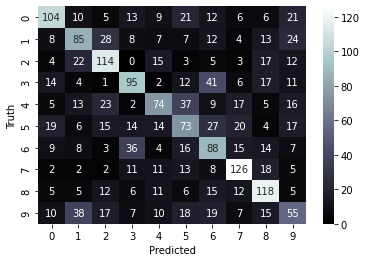

In [11]:
sns_plot = sns.heatmap(training_metrics['confusion_matrix'],
                        annot=True, fmt='d', cmap='bone')
# xlabel
plt.xlabel('Predicted')
# ylabel
plt.ylabel('Truth')
plt.show()
# sns_plot.get_figure().savefig('1705092_confusion_matrix.pdf')
plt.close()

In [104]:
from tqdm import tqdm
import numpy as np
import cv2
from pathlib import Path

In [106]:
def load_images(image_path_root, image_paths, output_dim=(28, 28)):
    images = []
    for image_path in tqdm(image_paths):
        try:
            # read image
            str_image_path = str(Path(image_path_root)/Path(image_path))
            image = cv2.imread(str_image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # black ink on white page. invert
            image = 255 - image
            
            # erosion and dilation
            kernel = np.ones((5, 5), np.uint8)
            # image = cv2.erode(image, kernel, iterations=1)
            image = cv2.dilate(image, kernel, iterations=1)
            # threshold otsu -> greyscaled
            
            _, image = cv2.threshold(
                image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            # resize
            image = cv2.resize(image, output_dim, interpolation=cv2.INTER_AREA)
            # # convert to rgb
            # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # normalize
            image = image / 255
            # (height, width) -> (channel, height, width)
            image = image.reshape(1, image.shape[0], image.shape[1])
            # image = image.transpose(2, 0, 1)
            images.append(image)
        except Exception as e:
            print(e)
            print("Error loading image: ", image_path)
    return np.array(images)

In [120]:
images = load_images(image_path_root='../Assignment4-Materials/NumtaDB_with_aug/training-d',image_paths=[
    # 'a00332.png',
    # 'a00524.png',
    # 'a00867.png',
    # 'a01325.png',
    # 'a01485.png'
    'd00062.png'
], output_dim=(32, 32))

100%|██████████| 1/1 [00:00<00:00, 91.16it/s]


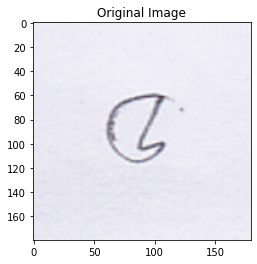

In [121]:
# original_image = "../Assignment4-Materials/NumtaDB_with_aug/training-a/a00332.png"
# original_image = "../Assignment4-Materials/NumtaDB_with_aug/training-a/a00524.png"
# original_image = "../Assignment4-Materials/NumtaDB_with_aug/training-a/a00867.png"
# original_image = "../Assignment4-Materials/NumtaDB_with_aug/training-a/a01325.png"
# original_image = "../Assignment4-Materials/NumtaDB_with_aug/training-a/a01485.png"
original_image = "../Assignment4-Materials/NumtaDB_with_aug/training-d/d00062.png"
original_image = cv2.imread(original_image)
# rgb
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# show
plt.title("Original Image")
plt.imshow(original_image)
plt.savefig(f"./report/original_image.pdf")
# plt.close()

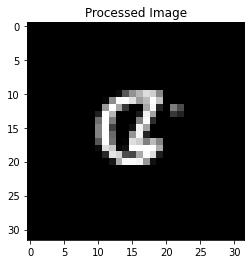

In [122]:
plt.title("Processed Image")
plt.imshow(images[0].transpose(1, 2, 0), cmap='gray')
plt.savefig(f"./report/processed_image.pdf")
# plt.close()

In [123]:
amar_model_metrics = load_pickle("c:/Users/USER/Downloads/metrics_45000-samples_0.2-test_ratio_0-random_seed_10-epochs_64-batch_size.pkl")

In [127]:
amar_model_metrics.keys()

dict_keys(['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy', 'val_f1', 'confusion_matrix'])

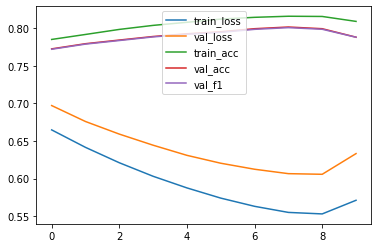

In [128]:
plt.plot(amar_model_metrics['train_loss'], label="train_loss")
plt.plot(amar_model_metrics['val_loss'], label="val_loss")
plt.plot(amar_model_metrics['train_accuracy'], label="train_acc")
plt.plot(amar_model_metrics['val_accuracy'], label="val_acc")
plt.plot(amar_model_metrics['val_f1'], label="val_f1")
plt.legend()

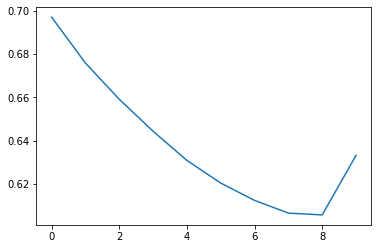

In [125]:
plt.plot(amar_model_metrics['val_loss'], label="val_loss")

In [130]:
training_loss_1.shape

(10,)

In [131]:
metrics_2 = load_pickle("./models/model_45000-samples_0.2-test_ratio_0-random_seed_10-epochs_64-batch_size-0.001_lr/training-metrics.pkl")

In [132]:
metrics_2['train_loss']

[2.1889868823832574,
 1.6873188604091363,
 1.508245247972213,
 1.3925207343616393,
 1.3086164294779832,
 1.2439995023732782,
 1.192134079087155,
 1.149450345684679,
 1.1133642182217731,
 1.0823634618049036]

In [133]:
metrics_3 = metrics_2 = load_pickle("./models/the_model_45000-samples_0.2-test_ratio_0-random_seed_10-epochs_64-batch_size/training-metrics.pkl")

In [41]:
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df),
    "./models/model_45000-samples_0.2-test_ratio_0-random_seed_10-epochs_64-batch_size-0.001_lr/training-metrics.pkl",
    "preproc_2"
)

In [42]:
train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df = get_metric_df(
    (train_loss_df, train_accuracy_df, val_loss_df, val_accuracy_df, val_f1_df),
    "./models/the_model_45000-samples_0.2-test_ratio_0-random_seed_10-epochs_64-batch_size/training-metrics.pkl",
    "preproc_3"
)

In [ ]:
# training stats ->
# per epoch train loss: [2.330989642940702, 1.9180169727650789, 1.7568770637045728, 1.6437397499969713, 1.5544233006549242, 1.4794012789635544, 1.4148354620098933, 1.3591589197911378, 1.3106342805863183, 1.2677703480971367]
# per epoch train accuracy: [0.22055505415162455, 0.3390399368231047, 0.4033167870036101, 0.44418434115523464, 0.4778034747292419, 0.5040049638989169, 0.5258348375451264, 0.5427572202166066, 0.5607795577617328, 0.5739508122743683]
# per epoch validation loss: [2.040678415877962, 1.8384092364966194, 1.7111267534845997, 1.6140057325194284, 1.5353313625875202, 1.4695360471939811, 1.4133205171253986, 1.3654266725300563, 1.322751748080419, 1.284672191964844]
# per epoch validation accuracy: [0.2886609558160505, 0.3658701532912534, 0.4109558160504959, 0.44860234445446345, 0.47666816952209196, 0.5029305680793508, 0.5213029756537421, 0.5429440937781785, 0.5584986474301172, 0.5703336339044184]
# per epoch validation f1 score: [0.2780807923727854, 0.35719864829000586, 0.40469005628866783, 0.44333229706314, 0.4720422025389016, 0.49859637315394484, 0.5171128606237885, 0.5389277967049405, 0.554984356861995, 0.5676130724765154]

# testing stats ->
# testing dataset -> d
# testing loss: 1.5039211833218273
# testing accuracy: 0.49624129079574625
# testing f1 score: 0.4914966361546166
# confusion matrix:
# [[515  21  11  85  58 111  43  78  41 144]
#  [  7 450  38  45  26   4  40  75  28 394]
#  [ 12  82 543   9  63  27  40 132  57 142]
#  [ 10   3   3 722   3  15 198  83  31  39]
#  [ 47  39  36  37 387  27  23 248  29 234]
#  [ 76  22  22 248  64 195 131 122  56 171]
#  [ 12   6  11 407   2   6 479  70  40  35]
#  [ 12  13  18  34  41   3  21 845  28  60]
#  [ 23  10   8  25  42  16  41  67 784  70]
#  [  8  90  18 159  30  14  46 149  30 493]]


In [15]:
training_loss_1 = np.array([2.330989642940702, 1.9180169727650789, 1.7568770637045728, 1.6437397499969713, 1.5544233006549242, 1.4794012789635544, 1.4148354620098933, 1.3591589197911378, 1.3106342805863183, 1.2677703480971367])

In [16]:
train_loss_df['preproc_1'] = training_loss_1

In [17]:
train_loss_df

,epoch,preproc_2,preproc_3,preproc_1
0,1,2.188987,1.990782,2.330990
1,2,1.687319,1.319235,1.918017
2,3,1.508245,1.117118,1.756877
3,4,1.392521,0.997484,1.643740
4,5,1.308616,0.913742,1.554423
5,6,1.244000,0.850003,1.479401
6,7,1.192134,0.799418,1.414835
7,8,1.149450,0.757457,1.359159
8,9,1.113364,0.721855,1.310634
9,10,1.082363,0.691183,1.267770


In [23]:
plot_metric(train_loss_df[['epoch','preproc_1', 'preproc_2', 'preproc_3']], "preproc_train_loss", "Training Loss", "Loss")

In [24]:
train_accuracy_1 = np.array([0.22055505415162455, 0.3390399368231047, 0.4033167870036101, 0.44418434115523464, 0.4778034747292419, 0.5040049638989169, 0.5258348375451264, 0.5427572202166066, 0.5607795577617328, 0.5739508122743683])

In [25]:
train_accuracy_df['preproc_1'] = train_accuracy_1

In [26]:
train_accuracy_df

,epoch,preproc_2,preproc_3,preproc_1
0,1,0.285340,0.385125,0.220555
1,2,0.433862,0.567859,0.339040
2,3,0.498731,0.636366,0.403317
3,4,0.538555,0.674836,0.444184
4,5,0.568254,0.704535,0.477803
5,6,0.589519,0.724193,0.504005
6,7,0.606696,0.741341,0.525835
7,8,0.621192,0.754174,0.542757
8,9,0.633574,0.765879,0.560780
9,10,0.644038,0.776201,0.573951


In [27]:
plot_metric(train_accuracy_df[['epoch','preproc_1', 'preproc_2', 'preproc_3']], "preproc_train_acc", "Training Accuracy", "Accuracy")

In [28]:
validation_loss_1 = np.array([2.040678415877962, 1.8384092364966194, 1.7111267534845997, 1.6140057325194284, 1.5353313625875202, 1.4695360471939811, 1.4133205171253986, 1.3654266725300563, 1.322751748080419, 1.284672191964844])

In [43]:
val_loss_df['preproc_1'] = validation_loss_1

In [44]:
val_loss_df

,epoch,preproc_2,preproc_3,preproc_1
0,1,1.839640,1.504451,2.040678
1,2,1.610439,1.224935,1.838409
2,3,1.472185,1.075066,1.711127
3,4,1.379243,0.979717,1.614006
4,5,1.309575,0.910938,1.535331
5,6,1.255615,0.856988,1.469536
6,7,1.211462,0.813870,1.413321
7,8,1.174719,0.777997,1.365427
8,9,1.144085,0.747065,1.322752
9,10,1.118325,0.721444,1.284672


In [46]:
plot_metric(val_loss_df[['epoch','preproc_1', 'preproc_2', 'preproc_3']], "preproc_val_loss", "Validation Loss", "Loss")

In [47]:
val_accuracy_1 = np.array([0.2886609558160505, 0.3658701532912534, 0.4109558160504959, 0.44860234445446345, 0.47666816952209196, 0.5029305680793508, 0.5213029756537421, 0.5429440937781785, 0.5584986474301172, 0.5703336339044184])

In [48]:
val_accuracy_df['preproc_1'] = val_accuracy_1

In [49]:
plot_metric(val_accuracy_df[['epoch','preproc_1', 'preproc_2', 'preproc_3']], "preproc_val_acc", "Validation Accuracy", "Accuracy")

In [50]:
val_f1_1 = np.array([0.2780807923727854, 0.35719864829000586, 0.40469005628866783, 0.44333229706314, 0.4720422025389016, 0.49859637315394484, 0.5171128606237885, 0.5389277967049405, 0.554984356861995, 0.5676130724765154])

In [51]:
val_f1_df['preproc_1'] = val_f1_1

In [52]:
plot_metric(val_f1_df[['epoch','preproc_1', 'preproc_2', 'preproc_3']], "preproc_val_f1", "Validation F1 Score", "F1 Score")

In [2]:
#  [[515  21  11  85  58 111  43  78  41 144]
#  [  7 450  38  45  26   4  40  75  28 394]
#  [ 12  82 543   9  63  27  40 132  57 142]
#  [ 10   3   3 722   3  15 198  83  31  39]
#  [ 47  39  36  37 387  27  23 248  29 234]
#  [ 76  22  22 248  64 195 131 122  56 171]
#  [ 12   6  11 407   2   6 479  70  40  35]
#  [ 12  13  18  34  41   3  21 845  28  60]
#  [ 23  10   8  25  42  16  41  67 784  70]
#  [  8  90  18 159  30  14  46 149  30 493]]
cm_1 = np.array(
    [
        [515, 21, 11, 85, 58, 111, 43, 78, 41, 144],
        [7, 450, 38, 45, 26, 4, 40, 75, 28, 394],
        [12, 82, 543, 9, 63, 27, 40, 132, 57, 142],
        [10, 3, 3, 722, 3, 15, 198, 83, 31, 39],
        [47, 39, 36, 37, 387, 27, 23, 248, 29, 234],
        [76, 22, 22, 248, 64, 195, 131, 122, 56, 171],
        [12, 6, 11, 407, 2, 6, 479, 70, 40, 35],
        [12, 13, 18, 34, 41, 3, 21, 845, 28, 60],
        [23, 10, 8, 25, 42, 16, 41, 67, 784, 70],
        [8, 90, 18, 159, 30, 14, 46, 149, 30, 493]
    ]
)

In [3]:
# plot
sns_plot = sns.heatmap(cm_1,
                        annot=True, fmt='d', cmap='bone')
# xlabel
plt.xlabel('Predicted')
# ylabel
plt.ylabel('Truth')
# plt.show()
sns_plot.get_figure().savefig(f'./report/preproc_1_cm.pdf')
plt.close()

In [55]:
# bar plot
acc_1 = 0.49624129079574625
f1_1 = 0.4914966361546166

acc_2 = 0.6546571323799046
f1_2 = 0.6539424840156454

acc_3 = 0.7487165383204987
f1_3 = 0.750704863697553

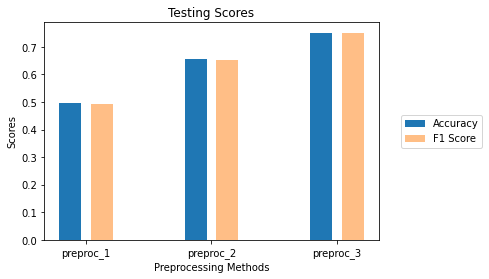

In [69]:

fig, ax = plt.subplots()
rects1 = ax.bar([1,3,5], [acc_1, acc_2, acc_3], 0.35, label='Accuracy')
rects2 = ax.bar([1.5,3.5,5.5], [f1_1, f1_2, f1_3], 0.35, label='F1 Score', alpha=0.5)

ax.set_xlabel('Preprocessing Methods')
ax.set_ylabel('Scores')
ax.set_title('Testing Scores')
ax.set_xticks([1.25,3.25,5.25])
ax.set_xticklabels(('preproc_1', 'preproc_2', 'preproc_3'))
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
# save
fig.savefig(f'./report/preproc_scores.pdf', bbox_inches='tight')

<AxesSubplot:ylabel='Accuracy'>

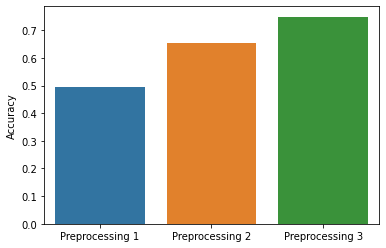

In [61]:
sns.barplot(x=df.index, y="Accuracy", data=df)

In [59]:
sns.barplot(x=['preproc_1', 'preproc_2', 'preproc_3'], y=[[acc_1, acc_2, acc_3],[f1_1, f1_2, f1_3]])
# sns.barplot(x=['preproc_1', 'preproc_2', 'preproc_3'], y=[f1_1, f1_2, f1_3])

TypeError: Neither the `x` nor `y` variable appears to be numeric.